# Randomized Search CV with XGBoost

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [16]:
import utils

# preprocessed = pd.read_csv("data/preprocessed.csv")
# traindata = utils.preprocess_modeling_data(preprocessed, ohe=False, mean_imputation=True)
traindata = pd.read_csv("data/final.csv")
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14046 entries, 0 to 14045
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surface_x                14046 non-null  float64
 1   surface_y                14046 non-null  float64
 2   gross_perforated_length  14046 non-null  float64
 3   number_of_stages         14046 non-null  float64
 4   total_proppant           14046 non-null  float64
 5   total_fluid              14046 non-null  float64
 6   true_vertical_depth      14046 non-null  float64
 7   frac_seasoning           14046 non-null  float64
 8   OilPeakRate              14046 non-null  float64
 9   sibling_well             14046 non-null  int64  
 10  batch_concurrent_frac    14046 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [17]:
traindata.describe().round()

surface_x  surface_y  gross_perforated_length  number_of_stages  \
count    14046.0    14046.0                  14046.0           14046.0   
mean   1008508.0  1116650.0                   6552.0              31.0   
std     156608.0   323994.0                   2274.0              16.0   
min     584041.0   496529.0                   1079.0               2.0   
25%     885624.0   816392.0                   4409.0              20.0   
50%    1001388.0  1182058.0                   6717.0              30.0   
75%    1111264.0  1396578.0                   8220.0              41.0   
max    1667405.0  1794624.0                  15500.0            1027.0   

       total_proppant  total_fluid  true_vertical_depth  frac_seasoning  \
count         14046.0      14046.0              14046.0         14046.0   
mean         769899.0    4039800.0               8863.0             4.0   
std          886718.0    2606384.0               1784.0             1.0   
min               0.0        738.0               2430.0             0.0   
25%          425857.0    2075872.0               7717.0             3.0   
50%          707571.0    3585285.0               9086.0             4.0   
75%         1054714.0    5710980.0              10204.0             4.0   
max        91090733.0   34424017.0              13145.0             8.0   

       OilPeakRate  sibling_well  batch_concurrent_frac  
count      14046.0       14046.0                14046.0  
mean         229.0           0.0                    0.0  
std          152.0           0.0                    0.0  
min            0.0           0.0                    0.0  
25%          122.0           0.0                    0.0  
50%          201.0           0.0                    0.0  
75%          304.0           1.0                    1.0  
max         2855.0           1.0                    1.0

In [19]:
pd.set_option("display.max_columns", None)
traindata.sort_values(by="total_proppant",ascending=False)

surface_x     surface_y  gross_perforated_length  number_of_stages  \
12936  9.692478e+05  1.361628e+06              5003.937008       1027.400720   
9422   1.072246e+06  1.306749e+06             10931.102360         68.999099   
13358  9.034680e+05  1.355616e+06             11224.409450         68.811812   
13357  9.034508e+05  1.355578e+06             11223.425200         68.835499   
9782   9.858701e+05  1.381853e+06              9864.173228         67.478753   
...             ...           ...                      ...               ...   
2981   1.134828e+06  1.056898e+06              4351.377953         12.163271   
4541   1.252864e+06  9.679122e+05              4427.165354         11.805705   
3446   8.980891e+05  1.126698e+06              3347.440945          8.221092   
3463   8.826111e+05  1.225181e+06              3375.000000         15.000000   
8517   1.088440e+06  1.239307e+06              9187.992126         31.514303   

       total_proppant   total_fluid  true_vertical_depth  frac_seasoning  \
12936    9.109073e+07  2.129871e+06          9435.039370        4.077537   
9422     2.496000e+06  9.278662e+06          9477.362205        4.043051   
13358    2.462571e+06  1.005888e+07          9228.346457        3.891820   
13357    2.456857e+06  1.018057e+07          9274.606299        3.784190   
9782     2.452714e+06  1.163041e+07          9178.149606        3.912023   
...               ...           ...                  ...             ...   
2981     4.690143e+03  5.209662e+04          6866.141732        4.143135   
4541     3.298643e+03  5.254501e+03          4577.755906        2.833213   
3446     2.169571e+03  4.720083e+04          5315.944882        2.890372   
3463     1.422857e+03  2.145163e+04          2968.503937        3.295837   
8517     0.000000e+00  5.878035e+06          9648.622047        3.737670   

       OilPeakRate  sibling_well  batch_concurrent_frac  
12936   182.904790             0                      0  
9422    542.724149             1                      1  
13358   348.642911             1                      1  
13357   400.190538             1                      1  
9782    496.131029             1                      1  
...            ...           ...                    ...  
2981    105.476207             1                      0  
4541     59.321438             0                      0  
3446     72.488106             0                      0  
3463     27.535719             0                      0  
8517    250.440515             0                      0  

[14046 rows x 11 columns]

In [20]:
traindata.drop(12936, inplace=True)

In [21]:
pd.set_option("display.max_columns", None)
traindata.sort_values(by="number_of_stages",ascending=False)

surface_x    surface_y  gross_perforated_length  number_of_stages  \
11164  9.717790e+05  1542422.052             15500.000000         80.835401   
11163  9.717748e+05  1542397.475             15313.976380         79.627264   
11132  9.836588e+05  1531801.990             14738.188980         78.026091   
11133  9.836690e+05  1531819.216             14698.818900         77.861778   
11131  9.833883e+05  1530161.457             14698.818900         77.434220   
...             ...          ...                      ...               ...   
3037   1.095952e+06  1087429.434              4916.338583          4.000000   
2978   1.094463e+06  1083485.042              4023.622047          3.000000   
4447   1.087217e+06  1163746.617              1392.716535          3.000000   
2979   1.137037e+06  1150011.298              3710.629921          2.000000   
2850   1.090334e+06  1021753.195              3742.125984          2.000000   

       total_proppant   total_fluid  true_vertical_depth  frac_seasoning  \
11164    2.046286e+06  1.321818e+07          6996.062992        4.653960   
11163    2.021429e+06  1.296230e+07          7250.984252        4.605170   
11132    1.935571e+06  1.427108e+07          7349.409449        4.219508   
11133    1.968714e+06  1.368067e+07          7147.637795        4.836282   
11131    1.960000e+06  1.339203e+07          7172.244094        4.812184   
...               ...           ...                  ...             ...   
3037     1.985500e+05  1.355108e+06          6102.362205        3.583519   
2978     1.307930e+05  9.650062e+05          6324.803150        4.867534   
4447     1.471429e+04  7.041725e+04          4509.842520        2.890372   
2979     1.297143e+05  9.276464e+05         10861.220470        4.430817   
2850     3.376014e+05  1.769545e+06          9694.881890        4.454347   

       OilPeakRate  sibling_well  batch_concurrent_frac  
11164   180.714314             0                      1  
11163   298.805602             0                      1  
11132   277.450043             0                      0  
11133   146.619070             0                      1  
11131   156.452405             1                      1  
...            ...           ...                    ...  
3037     50.717695             1                      0  
2978     55.119056             0                      0  
4447     20.218541             0                      0  
2979    130.175417             0                      0  
2850     23.940480             0                      0  

[14045 rows x 11 columns]

In [37]:
TARGET_COL = "OilPeakRate"

X = traindata.drop(columns=[TARGET_COL])
y = traindata[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Vanilla model

In [39]:
model = xgb.XGBRegressor(objective="reg:squarederror",
                         booster="gbtree", 
                         enable_categorical=True)

params = {
    "learning_rate": np.linspace(1e-2, .1, num=4),
    # "gamma": np.logspace(-1, 2, num=5),
    "gamma": [3.1622776601683795],
    "max_depth": [7, 9],
    "min_child_weight": np.logspace(-1, 3, num=10, dtype=int),
    "subsample": np.linspace(.5, .9, num=4),
    # "colsample_bytree": [0.5, 0.7, 0.9],
    "n_estimators": [500],
    # "alpha": np.linspace(5e-2, 1, num=5),
    # "lambda": np.linspace(1e-3, 1e-1, num=5),
}

search = RandomizedSearchCV(model,
                        param_distributions=params,
                        n_iter=25,
                        scoring="neg_root_mean_squared_error",
                        n_jobs=-1, cv=10, 
                        verbose=0,)

search.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])

y_pred = search.predict(X_test)
y_pred_train = search.predict(X_train)
# print("MSE: ", mean_squared_error(y_test, y_pred))
# print("MAE: ", mean_absolute_error(y_test, y_pred))
# print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))

[0]	validation_0-rmse:149.71606	validation_1-rmse:150.17832
[1]	validation_0-rmse:147.62810	validation_1-rmse:147.96133
[2]	validation_0-rmse:145.57639	validation_1-rmse:145.82598
[0]	validation_0-rmse:149.60674	validation_1-rmse:150.11732
[3]	validation_0-rmse:143.64692	validation_1-rmse:143.79987
[1]	validation_0-rmse:147.51185	validation_1-rmse:147.85070
[4]	validation_0-rmse:141.86196	validation_1-rmse:141.91009
[2]	validation_0-rmse:145.65856	validation_1-rmse:145.84679
[5]	validation_0-rmse:140.16511	validation_1-rmse:140.12483
[3]	validation_0-rmse:143.74556	validation_1-rmse:143.82403
[6]	validation_0-rmse:138.58503	validation_1-rmse:138.44703
[0]	validation_0-rmse:149.62015	validation_1-rmse:150.16624
[4]	validation_0-rmse:141.96389	validation_1-rmse:141.92254
[1]	validation_0-rmse:147.47296	validation_1-rmse:147.95304
[7]	validation_0-rmse:137.08189	validation_1-rmse:136.85855
[2]	validation_0-rmse:145.57594	validation_1-rmse:145.92578
[8]	validation_0-rmse:135.73821	validati

In [40]:
search.best_params_

{'subsample': 0.7666666666666666,
 'n_estimators': 500,
 'min_child_weight': 0,
 'max_depth': 7,
 'learning_rate': 0.04,
 'gamma': 3.1622776601683795}

In [ ]:
search.best_params_

{'subsample': 0.7666666666666666,
 'n_estimators': 500,
 'min_child_weight': 0,
 'max_depth': 9,
 'learning_rate': 0.04,
 'gamma': 3.1622776601683795}

In [41]:
# search.best_estimator_.save_model("model/xgb_model.json")
import pickle

with open("model/xgb_model-FINAL.sav", "wb") as f:
    pickle.dump(search.best_estimator_, f)

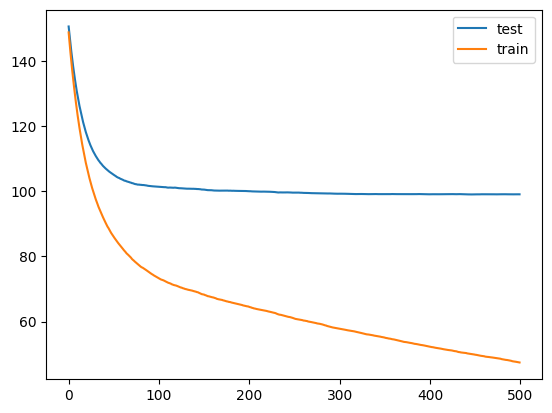

In [33]:
plt.plot(
    search.best_estimator_.evals_result()["validation_0"]["rmse"], label="test")
plt.plot(search.best_estimator_.evals_result()["validation_1"]["rmse"], label="train")
plt.legend()

Text(0.5, 1.0, 'XGBoost Regression')

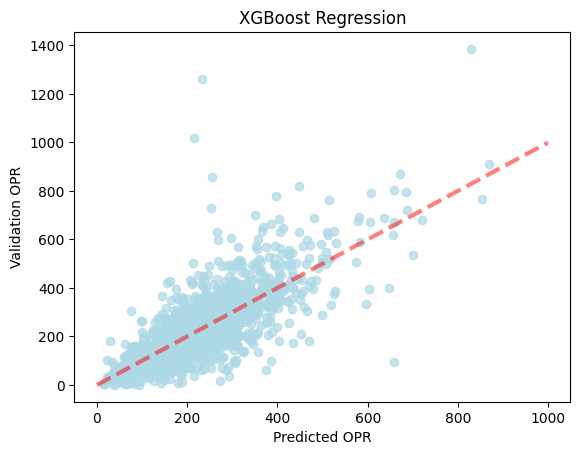

In [75]:
plt.scatter(
    y_pred,
    y_test,
    alpha=0.7,
    color="lightblue"
)

plt.plot(np.arange(0, 1000), np.arange(0, 1000), color="red", ls="--", lw=3, alpha=.5)
plt.xlabel("Predicted OPR")
plt.ylabel("Validation OPR")
plt.title("XGBoost Regression")

In [58]:
X.columns

Index(['surface_x', 'surface_y', 'gross_perforated_length', 'number_of_stages',
       'total_proppant', 'total_fluid', 'true_vertical_depth',
       'frac_seasoning', 'sibling_well', 'batch_concurrent_frac'],
      dtype='object')

Text(0.5, 0, 'Xgboost Feature Importance')

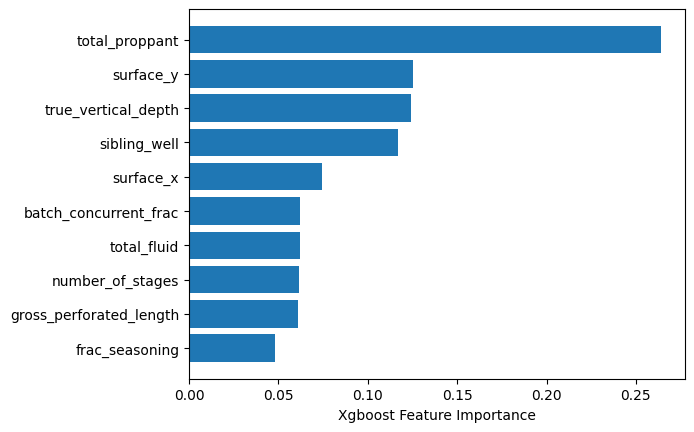

In [69]:
# xgb.plot_importance(search.best_estimator_, importance_type="gain")
# # put column names from X in the y label
# plt.ylabel("Feature")
# plt.xlabel("Feature Importance Score")
# plt.title("Feature Importance")

feature_names = X.columns
feature_importance = search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

# set yticks to be capitalized


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

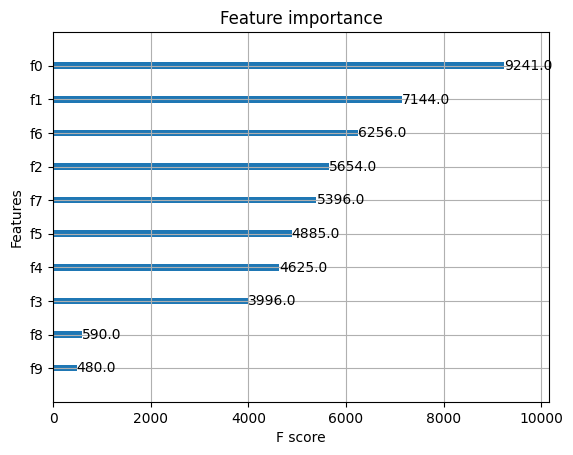

In [42]:
xgb.plot_importance(search.best_estimator_)

In [23]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(200,100,50),)

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE:  112.78379464041369


In [24]:
print("RMSE train: ", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

RMSE train:  104.43752877626618


# Add cluster grouping

In [41]:
final = pd.read_csv("data/final.csv")
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14046 entries, 0 to 14045
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surface_x                14046 non-null  float64
 1   surface_y                14046 non-null  float64
 2   gross_perforated_length  14046 non-null  float64
 3   number_of_stages         14046 non-null  float64
 4   total_proppant           14046 non-null  float64
 5   total_fluid              14046 non-null  float64
 6   true_vertical_depth      14046 non-null  float64
 7   frac_seasoning           14046 non-null  float64
 8   OilPeakRate              14046 non-null  float64
dtypes: float64(9)
memory usage: 987.7 KB


In [42]:
cluster_labels = pd.read_csv("data/cluster_label_features.csv")
cluster_labels.rename(columns={"Unnamed: 0": "original_index"}, inplace=True)
cluster_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17868 entries, 0 to 17867
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         17868 non-null  int64  
 1   surface_x              17868 non-null  float64
 2   surface_y              17868 non-null  float64
 3   bh_x                   17868 non-null  float64
 4   bh_y                   17868 non-null  float64
 5   horizontal_midpoint_x  17868 non-null  float64
 6   horizontal_midpoint_y  17868 non-null  float64
 7   horizontal_toe_x       17868 non-null  float64
 8   horizontal_toe_y       17868 non-null  float64
 9   surface_toe_len        17868 non-null  float64
 10  surface_midpoint_len   17868 non-null  float64
 11  surface_bh_len         17868 non-null  float64
 12  toe_midpoint_len       17868 non-null  float64
 13  toe_bh_len             17868 non-null  float64
 14  midpoint_bh_len        17868 non-null  float64
 15  cl

In [43]:
final = final.merge(cluster_labels[["original_index", "cluster", "opr_mean_pct_diff"]], left_index=True, right_on="original_index")
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12971 entries, 0 to 12970
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surface_x                12971 non-null  float64
 1   surface_y                12971 non-null  float64
 2   gross_perforated_length  12971 non-null  float64
 3   number_of_stages         12971 non-null  float64
 4   total_proppant           12971 non-null  float64
 5   total_fluid              12971 non-null  float64
 6   true_vertical_depth      12971 non-null  float64
 7   frac_seasoning           12971 non-null  float64
 8   OilPeakRate              12971 non-null  float64
 9   original_index           12971 non-null  int64  
 10  cluster                  12971 non-null  int64  
 11  opr_mean_pct_diff        12971 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.3 MB


In [50]:
(pd.qcut(final[["cluster", "opr_mean_pct_diff"]].drop_duplicates().opr_mean_pct_diff, q=4, labels=False) +1)

0        2
42       1
53       2
54       3
55       3
66       4
3692     1
4247     3
4300     4
4738     4
4749     1
4847     2
4850     1
5041     2
5044     1
5641     3
6178     4
6434     3
8566     2
12741    4
Name: opr_mean_pct_diff, dtype: int64

# Predict Test Set

In [77]:
TEST_SET_FILE = "data/scoring.csv"

testset = pd.read_csv(TEST_SET_FILE, index_col=0)

testset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 29437 to 30048
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     400 non-null    float64
 1   surface_y                     400 non-null    float64
 2   bh_x                          400 non-null    float64
 3   bh_y                          400 non-null    float64
 4   standardized_operator_name    400 non-null    int64  
 5   gross_perforated_length       400 non-null    float64
 6   number_of_stages              400 non-null    float64
 7   total_proppant                400 non-null    float64
 8   total_fluid                   400 non-null    float64
 9   true_vertical_depth           400 non-null    float64
 10  ffs_frac_type                 400 non-null    object 
 11  proppant_intensity            400 non-null    float64
 12  frac_fluid_intensity          400 non-null    float64
 13  aver

In [85]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/juansegundohevia/Documents/repos/rice-datathon-2024-chevron/utils.py'>

In [86]:
testset = utils.prepare_test_data(testset)

In [97]:
testset.drop(columns=["average_stage_length"], inplace=True)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14045 entries, 0 to 14045
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surface_x                14045 non-null  float64
 1   surface_y                14045 non-null  float64
 2   gross_perforated_length  14045 non-null  float64
 3   number_of_stages         14045 non-null  float64
 4   total_proppant           14045 non-null  float64
 5   total_fluid              14045 non-null  float64
 6   true_vertical_depth      14045 non-null  float64
 7   frac_seasoning           14045 non-null  float64
 8   sibling_well             14045 non-null  int64  
 9   batch_concurrent_frac    14045 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.2 MB


In [98]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 29437 to 30048
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surface_x                400 non-null    float64
 1   surface_y                400 non-null    float64
 2   gross_perforated_length  400 non-null    float64
 3   number_of_stages         400 non-null    float64
 4   total_proppant           400 non-null    float64
 5   total_fluid              400 non-null    float64
 6   true_vertical_depth      400 non-null    float64
 7   frac_seasoning           400 non-null    float64
 8   sibling_well             400 non-null    int64  
 9   batch_concurrent_frac    400 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 34.4 KB


In [95]:
test_X

array([[-1.30670703,  2.26462623,  0.61963022, ...,  0.33758374,
         2.95907039, -0.1334605 ],
       [-1.27171418,  2.56046303, -0.04335482, ..., -0.68504627,
        -0.33794397, -0.1334605 ],
       [-1.27573749,  2.53634976,  0.81087591, ...,  0.08298925,
        -0.33794397, -0.1334605 ],
       ...,
       [ 0.83945668, -0.92450196,  1.21480997, ...,  0.16387462,
        -0.33794397, -0.1334605 ],
       [ 0.68267391,  0.03529133,  1.2009012 , ...,  0.16387462,
        -0.33794397, -0.1334605 ],
       [ 0.98738606,  1.33564476, -0.43280057, ...,  0.16387462,
        -0.33794397, -0.1334605 ]])

In [100]:
# Train model on entire †rain data set
model = xgb.XGBRegressor(objective="reg:squarederror",
                            booster="gbtree", 
                            enable_categorical=True,
                            subsample=0.7666666666666666,
                            n_estimators=500,
                            min_child_weight=0,
                            max_depth=7,
                            learning_rate=0.04,
                            gamma=3.1622776601683795)

test_scaler = StandardScaler()

final_X = test_scaler.fit_transform(X)
test_X = test_scaler.fit_transform(testset)

model.fit(final_X, y)

pred_test_opr = model.predict(test_X)

In [104]:
y.describe(percentiles=np.arange(.1, 1, .1))

count    14045.000000
mean       228.580154
std        152.396378
min          0.110714
10%         66.635248
20%        104.283349
30%        137.368248
40%        169.216693
50%        201.192491
60%        236.621465
70%        279.516710
80%        333.450052
90%        416.694350
max       2855.469490
Name: OilPeakRate, dtype: float64

In [101]:
pd.Series(pred_test_opr).describe(percentiles=np.arange(0, 1, .1))

count    400.000000
mean     181.093628
std       95.469803
min       35.296432
0%        35.296432
10%      100.328456
20%      116.683127
30%      127.669302
40%      136.399142
50%      146.797745
60%      163.908588
70%      193.309384
80%      239.734708
90%      322.250717
max      525.729126
dtype: float64

<Axes: xlabel='OilPeakRate', ylabel='Count'>

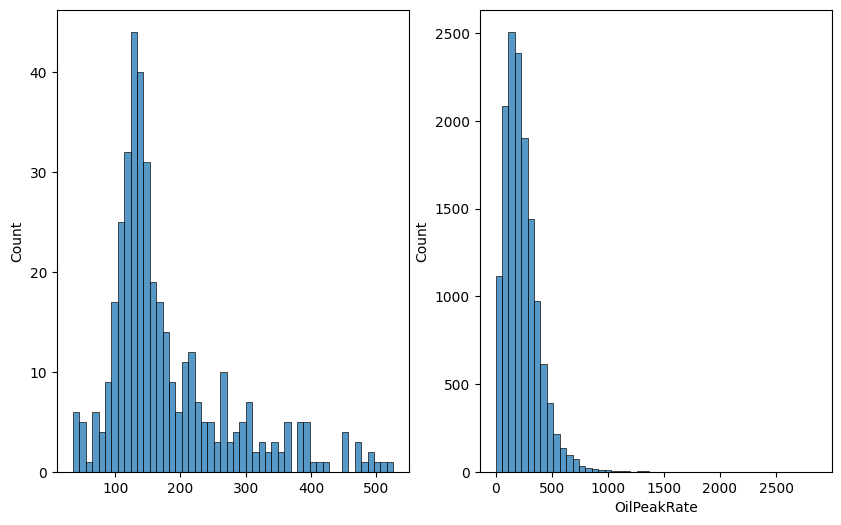

In [110]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(
    x=pred_test_opr,
    ax=ax[0],
    bins=50
)
sns.histplot(
    x=y,
    ax=ax[1],
    bins=50
)

In [111]:
testset["predicted_opr"] = pred_test_opr

surface_x     surface_y  gross_perforated_length  number_of_stages  \
29437  9.471472e+05  1.035963e+06              6370.078740              13.0   
29438  9.556775e+05  1.046164e+06              5244.094488              13.0   
29439  9.546967e+05  1.045332e+06              6694.881890              13.0   
29441  9.580318e+05  1.040111e+06              6694.881890              13.0   
29442  9.679726e+05  1.038412e+06              2520.669291              13.0   
...             ...           ...                      ...               ...   
30036  1.482062e+06  9.541835e+05              4302.165354              20.0   
30037  1.481784e+06  9.519994e+05              4342.519685              20.0   
30038  1.470326e+06  9.259947e+05              7380.905512              20.0   
30046  1.432107e+06  9.590904e+05              7357.283465              20.0   
30048  1.506388e+06  1.003929e+06              4582.677165              20.0   

       total_proppant   total_fluid  true_vertical_depth  frac_seasoning  \
29437     360142.8571  2.049015e+06          8337.598425        0.967505   
29438     376714.2857  1.876124e+06          8808.070866        0.732569   
29439     438285.7143  2.773870e+06          8638.779528        0.909015   
29441     438285.7143  2.773870e+06          8536.417323        0.909015   
29442     273857.1429  1.340587e+06          8668.307087        0.909015   
...               ...           ...                  ...             ...   
30036     215285.7143  1.163932e+06          5226.377953        0.909015   
30037     228571.4286  1.303240e+06          5245.078740        0.927597   
30038     450857.1429  2.174185e+06          5288.385827        0.927597   
30046     228714.2857  1.035400e+06          5109.251969        0.927597   
30048     228714.2857  4.880825e+05          5292.322835        0.927597   

       sibling_well  batch_concurrent_frac  
29437             1                      0  
29438             0                      0  
29439             0                      0  
29441             0                      0  
29442             0                      0  
...             ...                    ...  
30036             0                      0  
30037             0                      0  
30038             0                      0  
30046             0                      0  
30048             0                      0  

[400 rows x 10 columns]

In [128]:
testset.to_csv("data/FINAL-RESULTS-predicted-opr.csv", index=False)

In [114]:
est = utils.estimate_stages(pd.read_csv("data/scoring.csv"), "total")

<Axes: >

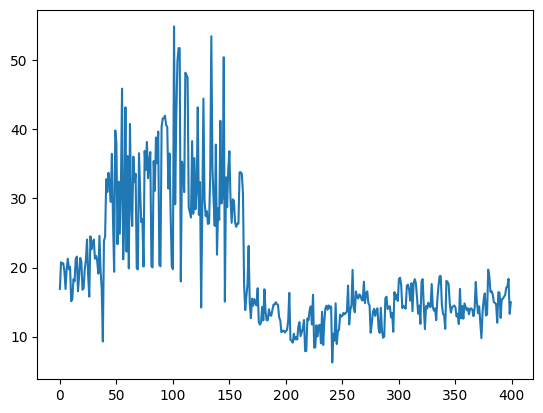

In [123]:
est.plot()

In [124]:
testset.number_of_stages

29437    13.0
29438    13.0
29439    13.0
29441    13.0
29442    13.0
         ... 
30036    20.0
30037    20.0
30038    20.0
30046    20.0
30048    20.0
Name: number_of_stages, Length: 400, dtype: float64

In [125]:
est

0      16.900231
1      20.761958
2      20.601140
3      20.601140
4      19.445321
         ...    
395    17.095484
396    17.254281
397    18.362854
398    13.305934
399    14.971758
Name: predicted_number_of_total_stages, Length: 400, dtype: float64

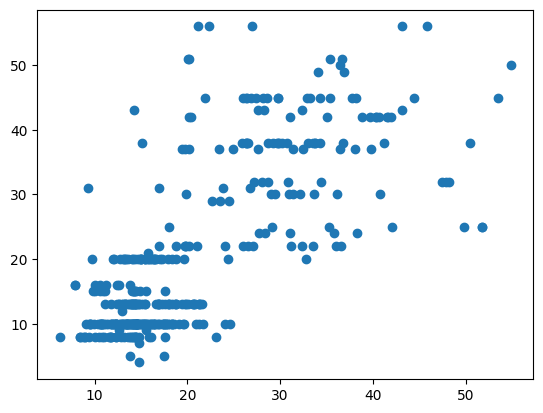

In [127]:
plt.scatter(est, testset.number_of_stages)